# COVID-19 Cases in The United States vs Worldwide

![title](image.png)

The data being reviewed for this project shows COVID-19 cases worldwide from January 20, 2020 through June 1, 2020. However, this data analysis project does a comparison of positive case in the United States with other countries.

The main comparisons are:
- Positive cases in the US and Worldwide
- Recovered cases in the US and Worldwide
- Deaths in the US and Worldwide

After doing the analysis, I came to the conclusion that positive cases in the United States were significantly higher than all countries combined. However, testing was widely available in the United States in comparison to the rest of the world at the beginning of the pandemic. In addition, while "Positive" cases were a lot higher than "Recovered" cases, the analyst that initially studied the data referred other analysts to an article from Nate Silver with Five Thirty Eight about how positive COVID-19 cases need to be taken with a grain of salt.

Original dataset:
https://www.kaggle.com/datasets/lin0li/covid19testing

Additional Source:
https://fivethirtyeight.com/features/coronavirus-case-counts-are-meaningless/

* This data analysis is my final project for Code Louisville - Data Analysis 1

## Importing data to notebook

Requirement 1: Read in data

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
covid_df = pd.read_csv('covid19.csv')

## Data Cleaning Process

Requirement 2: Manipulate and clean data

Using .head( ) and .tail( ) methods to make sure all dataframe is being imported

In [71]:
covid_df.head()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0


In [72]:
covid_df.tail(2)

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
10901,2020-06-01,Asia,TW,Taiwan,All States,0,0,0,0,72319,0,0,237,0
10902,2020-06-01,Asia,VN,Vietnam,All States,0,0,0,0,261004,0,0,0,0


Using .shape method to have a better idea of the number of columns and rows of the dataframe. This means there is a total of 10,903 rowns and 14 columns

In [73]:
covid_df.shape

(10903, 14)

Using .info( ) method to check if any important values are missing. However, I see that I have a complete dataframe.

In [74]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10903 entries, 0 to 10902
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     10903 non-null  object
 1   Continent_Name           10903 non-null  object
 2   Two_Letter_Country_Code  10903 non-null  object
 3   Country_Region           10903 non-null  object
 4   Province_State           10903 non-null  object
 5   positive                 10903 non-null  int64 
 6   hospitalized             10903 non-null  int64 
 7   recovered                10903 non-null  int64 
 8   death                    10903 non-null  int64 
 9   total_tested             10903 non-null  int64 
 10  active                   10903 non-null  int64 
 11  hospitalizedCurr         10903 non-null  int64 
 12  daily_tested             10903 non-null  int64 
 13  daily_positive           10903 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

Below you will see the list of all columns to determine if anything needs to be changed

In [75]:
covid_df.columns

Index(['Date', 'Continent_Name', 'Two_Letter_Country_Code', 'Country_Region',
       'Province_State', 'positive', 'hospitalized', 'recovered', 'death',
       'total_tested', 'active', 'hospitalizedCurr', 'daily_tested',
       'daily_positive'],
      dtype='object')

Created a dictionary to change 3 column names

In [76]:
covid_df.rename(columns={
    'Continent_Name': 'Continent',
    'Two_Letter_Country_Code': 'Country_Code',
    'Province_State': 'State'
}, inplace=True)

In [77]:
covid_df.columns

Index(['Date', 'Continent', 'Country_Code', 'Country_Region', 'State',
       'positive', 'hospitalized', 'recovered', 'death', 'total_tested',
       'active', 'hospitalizedCurr', 'daily_tested', 'daily_positive'],
      dtype='object')

This list was created to capitlize the first letter of each word

In [78]:
covid_df.columns = ['Date', 'Continent', 'Country_Code', 'Country_Region', 'State',
       'Positive', 'Hospitalized', 'Recovered', 'Death', 'Total_Tested',
       'Active', 'HospitalizedCurr', 'Daily_Tested', 'Daily_Positive']

In [79]:
covid_df.columns

Index(['Date', 'Continent', 'Country_Code', 'Country_Region', 'State',
       'Positive', 'Hospitalized', 'Recovered', 'Death', 'Total_Tested',
       'Active', 'HospitalizedCurr', 'Daily_Tested', 'Daily_Positive'],
      dtype='object')

After going through this cleaning, I realized I wanted to drop some columns to make analyzis easier

In [80]:
covid_df.drop(['Country_Code', 'State', 'Hospitalized', 'Total_Tested', 'Active', 'HospitalizedCurr', 'Daily_Tested', 'Daily_Positive'], axis=1, inplace=True )


In [81]:
covid_df.head()

,Date,Continent,Country_Region,Positive,Recovered,Death
0,2020-01-20,Asia,South Korea,1,0,0
1,2020-01-22,North America,United States,1,0,0
2,2020-01-22,North America,United States,1,0,0
3,2020-01-23,North America,United States,1,0,0
4,2020-01-23,North America,United States,1,0,0


## Data Analysis

Requirement 3: Analyze data

In [82]:
covid_df.describe()

,Positive,Recovered,Death
count,1.090300e+04,10903.000000,10903.000000
mean,1.776802e+04,2409.220490,947.592956
std,9.314346e+04,11254.209177,5507.242206
min,0.000000e+00,0.000000,0.000000
25%,4.400000e+01,0.000000,0.000000
50%,1.026000e+03,0.000000,6.000000
75%,7.440000e+03,500.500000,136.000000
max,1.783570e+06,171883.000000,98536.000000


Continent Column has 6 unique values, top value is North America, which shows up 6452 times. In other words, North America has the higher positive COVID-19 cases

In [83]:
covid_df['Continent'].describe()

count             10903
unique                6
top       North America
freq               6452
Name: Continent, dtype: object

In [84]:
covid_df.corr()

,Positive,Recovered,Death
Positive,1.000000,0.274848,0.927603
Recovered,0.274848,1.000000,0.330940
Death,0.927603,0.330940,1.000000


In [86]:
US = covid_df.loc[covid_df['Country_Region'] == 'United States', 'Positive'].sum()
US

133567277

In [87]:
Other = covid_df.loc[covid_df['Country_Region'] != 'United States', 'Positive'].sum()
Other

60157398

Recovered in US vs rest of the world

In [88]:
US = covid_df.loc[covid_df['Country_Region'] == 'United States', 'Recovered'].sum()
US

10548079

In [89]:
Other = covid_df.loc[covid_df['Country_Region'] != 'United States', 'Recovered'].sum()
Other

15719652

Deaths happened in US vs rest of the world

In [90]:
US = covid_df.loc[covid_df['Country_Region'] == 'United States', 'Death'].sum()
US

6808745

In [91]:
Other = covid_df.loc[covid_df['Country_Region'] != 'United States', 'Death'].sum()
Other

3522861

## Visualization

Requirement 4 and 5: Visualize data and interpret data

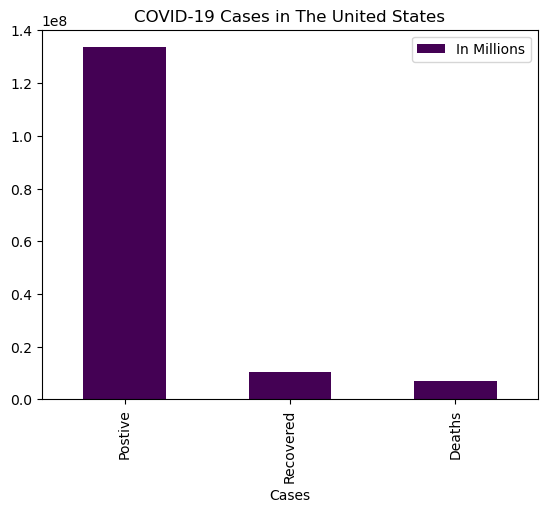

In [92]:
US = {'Cases' : ['Postive', 'Recovered', 'Deaths'],
    'In Millions' : [133567277, 10548079, 6808745]}
data = pd.DataFrame(US)
data.plot(kind='bar', x='Cases', title = 'COVID-19 Cases in The United States', colormap = 'viridis');


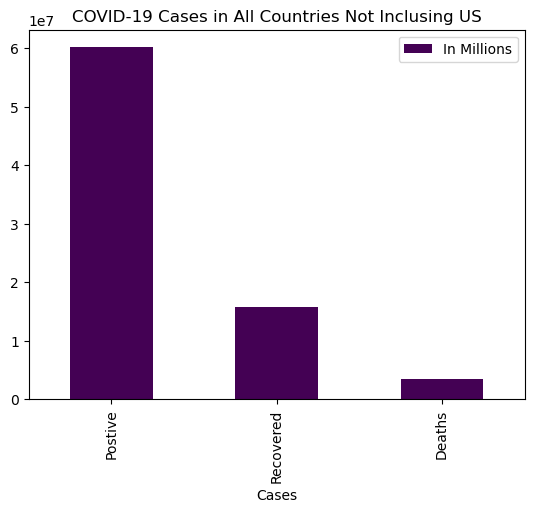

In [96]:
Other = {'Cases' : ['Postive', 'Recovered', 'Deaths'],
    'In Millions' : [60157398, 15719652, 3522861]}
data = pd.DataFrame(Other)
data.plot(kind='bar', x='Cases', title = 'COVID-19 Cases in All Countries Not Inclusing US', colormap = 'viridis');


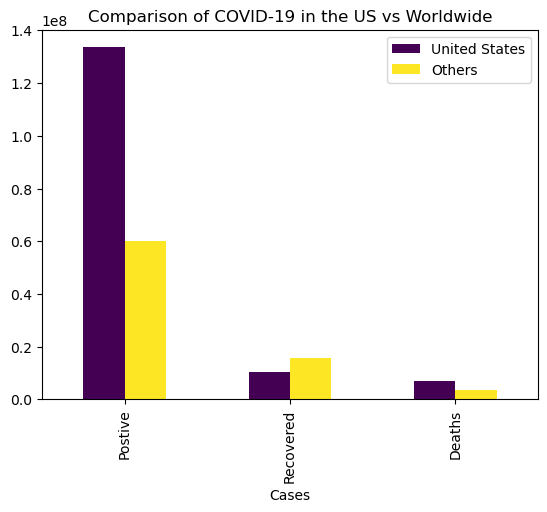

In [94]:
All = {'Cases' : ['Postive', 'Recovered', 'Deaths'],
    'United States' : [133567277, 10548079, 6808745],
        'Others' : [60157398, 15719652, 3522861]}
data = pd.DataFrame(All)
data.plot(kind='bar', x='Cases', title = 'Comparison of COVID-19 in the US vs Worldwide', colormap = 'viridis');